# Лекция 1

## Квазилинейное уравнение переноса.  
## Часть 5

<a id = "s_sec15"></a>
### 15. Анализ нелинейного уравнения Бюргерса

Линейное уравнение адвекции, рассмотренное нами ранее имеет большую методологическую ценность и позволяет на простом примере показать основные свойства и подходы построения численных схем для решения уравнений в частных производных. Однако, при рассмотрении реальных физических процессов нередко матеметическая модель содержит нелинейности обусловленные изменением параметров среды под действием самого протекающего процесса. 

Одним из важнейших примеров нелинейных уравнений, встречающихся при решении задач вычислительной физики явялется уравнение Бюргерса:

\begin{equation}
u_t + u \cdot u_x = \nu u_{xx}
\label{eq:burgers_eq}
\end{equation}

здесь роль скорости переноса играет сама неизвестная $u$, а коэффициент $\nu$ определяет диффузию величины $u$. Применительно к газовой динамике, уравнение Бюргерса может быть получено путем упрощения уравнений Навье-Стокса, описывающих законы сохранения массы и импульса (см. Приложение 4). В этом случае величина $u$ играет роль массовой скорости среды, а $\nu$ - её кинематической вязкости. Также уравнение Бюргерса используется как модель транспортного потока на автомагистралях. 

Если коэффициент диффузии $\nu \to 0$, то уравнение преобретает форму квазилинейного, т.н. невязкого уравнения Бюргерса:

\begin{equation}
u_t + u \cdot u_x = 0
\label{eq:nonvisc_burgers_eq}
\end{equation}

Невязкое уравнение Бюргерса \eqref{eq:nonvisc_burgers_eq} может быть представлено в виде закона сохранения, в дивергентной форме:

\begin{equation}
u_t + [f(u)]_x = 0
\label{eq:cons_nonvisc_burgers_eq}
\end{equation}

где функция потока $f(u) = \frac{u^2}{2}$. 

В отличие от линейного уравнения переноса, где решение может иметь разрывы только в том случае, если они содержатся в начальных или граничных данных, в квазилинейном уравнении даже при непрерывных начальных условиях могут возникать решения с разрывами. 

Проанализиреум решение с помощью метода характеристик. Введем характеристики, определяемые уравнением:

\begin{equation}
\frac{dx}{dt} = u(x,t)
\label{eq:characterstics}
\end{equation}

Вдоль каждой характеристики $x=x(t)$ решение $u(x(t),t)$ является функцией зависящей только от времени. Тогда

\begin{equation*}
\frac{d}{dt}(u(x(t),t)) = \frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} \frac{dx}{dt} = \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 
\end{equation*}

Отсюда можно видеть, что вдоль характеристики решение постоянно и определяется начальными условиями $u(x(t),t)=u(x(0),0)=u_0(x_0)$. В силу уравнения \eqref{eq:characterstics} из $u(x(t),t)=const$ следует, что характеристика есть прямая линия $x(t) = u_0(x_0) \cdot t + x_0$, где $x_0$ - абсцисса точки $(x_0,0)$ из которой выходит характеристика, а $u_0(x_0)$ определяет угол её наклона. Заданием начального распределения величины $u(x,0)=\phi(x)$ определяется картина характеристик и значения $u(x,t)$ в каждой точке полуплоскости $t > 0$.  

Обращая соотношение для характеристки можно получить $x_0 = x_0(x,t)$, и далее найти решение $u(x,t) = u_0(x_0(x,t))$. 

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


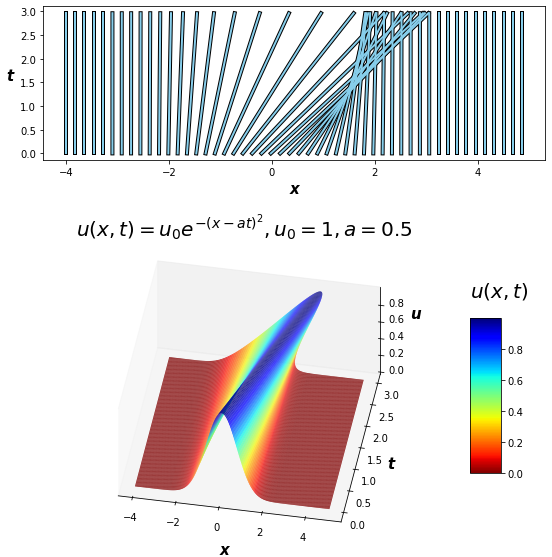

In [1]:
#%matplotlib notebook
# убрать комментарий в строке выше чтобы сделать рисунки интерактивными


from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

u0 = 1.0

x = np.linspace(-4, 5, 200)
t = np.linspace(0, 3, 200)

X, T = np.meshgrid(x, t)

U0 = u0 * np.exp(-X**2)

x_t = X + U0*T

fig = plt.figure(figsize=(9, 10))

gs = gridspec.GridSpec(2, 1, height_ratios=[0.5, 1.0]) 

ax = plt.subplot(gs[0])#fig.add_subplot(2,1,1)

ax.plot( x_t[::4,::4], t[::4], color='black', linewidth=4)
ax.plot( x_t[::4,::4], t[::4], color='skyblue', linewidth=2)

ax.set_xlabel("x", fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_ylabel("t  ", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

#ax = plt.axes(projection='3d', proj_type = 'ortho')

ax = plt.subplot(gs[1],projection='3d', proj_type = 'ortho') #fig.add_subplot(2,1,2,projection='3d', proj_type = 'ortho')

ax.set_title('$u(x,t) = u_0 e^{-(x-at)^2}, u_0=1, a=0.5 $\n', fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

ax.set_xlabel("\nx",fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_ylabel("t", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.set_zlabel("u", rotation=0,fontsize = 15,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
ax.view_init(60, -80)

ax.grid(False)

surf = ax.plot_surface(x_t, T, U0, rstride=1, cstride=1, edgecolor='none', cmap='jet_r')
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.set_label('$u(x,t)$', labelpad=-25, y=1.25, rotation=0, fontsize = 20,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')

plt.subplots_adjust(hspace=0.35)
plt.show()

Приведенный пример демонстрирует явление "опрокидывания" волны. Максимум величины $u$ движется быстрее, чем соседние значения. Это также легко видеть из x-t диаграммы характеристик уравнения. В результате, происходит прехлест профиля $u(x,t)$ и решение становится многозначным. Момент времени в который происходит опрокидывание будем обозначать величиной $t_B$.

Время опрокидывания $t_B$ можно найти рассматривая две характеристики берущие начало в точках $x_1$ и $x_2 = x_1 + \Delta x$. Найдем время пересечения этих характеристик:
 
\begin{equation*}
x_1 + u_0(x_1)\cdot t = x_2 + u_0(x_2)\cdot t
\end{equation*}

Из этого равенства получаем

\begin{equation*}
t = -\frac{x_1 - x_2}{u_0(x_1) - u_0(x_2)} = \frac{\Delta x}{u_0(x_1) - u_0(x_1 + \Delta x)} 
\end{equation*}

При $\Delta x \to 0$, $t \to -\frac{1}{u'_0(x_1)}$. Для нахождения $t_B$ необходимо найти минимальное значение $t$:

\begin{equation*}
t_b = \mathrm{\min_{x \in \mathbb{R}}}\left[ -\frac{1}{u'_0(x)} \right]
\end{equation*}

Очевидно, многозначениое решение, получаемое из метода характеристик не является физичным при $t > t_B$. Для того чтобы описать поведение $u(x,t)$ при $t > t_B$ необходимо перейти от гладких решений к разрывным. Появление такого рода разрывов и определяет формирование ударных волн. Однако на разрыве не будет существовать пространственная производная и для того чтобы считать решение с разрывом корректным для поставленной задачи необходмо несколько расширить наше представление о том, что является решением уравнения \eqref{eq:nonvisc_burgers_eq}. Такое расширение достигается путем определения так называемого *обобщенного* или *слабого* решения (weak solution). Однако, расширяя рамки возможных решений для рассматриваемого уравнения необходимо обеспечить его единственность. В данном случае при выборе конкретного обобщенного решения используются уже физически мотивированные критерии.

<a id = "s_sec16"></a>
### 16. Условия Рэнкина-Гюгонио на скачке.

Условия Рэнкина-Гюгонио определяют положение фронта ударной волны на заданный момент времени. Данное условие вытекает из дивергентной формы невязкого уравнения Бюргерса. Интегрируя \eqref{eq:cons_nonvisc_burgers_eq} по пространству в произвольной области $x_2 < x < x_1$, получим:

\begin{equation}
\frac{d}{dt} \int_{x_2}^{x_1} u(x,t) dx + f(u)|_{x_2}^{x_1} = 0
\label{eq:int_cons_law}
\end{equation}

Физический смысл здесь очевиден, \eqref{eq:int_cons_law} является интегральным законом сохранения величины $u$. Пусть величина $u$ испытывает скачек в точке $x = s(t)$, и $x_2 < s(t) < x_1$. Предположим также, что $u$ и её первая производная непрерывны по обе стороны от скачка, и сущуствуют односторонние пределы $x \to s(t)$ слева и справа. Тогда

\begin{equation*}
f(u)_{x_2} - f(u)_{x_1} = \frac{d}{dt} \int_{x_2}^{s(t)} u(x,t) dx + \frac{d}{dt} \int_{s(t)}^{x_1} u(x,t) dx = \\
u_2 \dot s - u_1 \dot s + \int_{x_2}^{s(t)} u_t(x,t) dx + \int_{s(t)}^{x_1} u_t(x,t) dx
\end{equation*}

Так как $u_t$ ограничена в обоих интервалах, интеграл стремится к нулю при сужении области интегрирования $x_1 \to s^+$, $x_2 \to s^-$. В результате, получаем:

\begin{equation*}
f(u)_{x_2} - f(u)_{x_1} = (u_2 - u_1) \dot s
\end{equation*}

Отметим, что приведенные рассуждения справедливы для любого закона сохранения, записанного в виде гиперболического уравнения в частных производных $u_t + \left[ f(u)  \right]_x = 0$. Если рассматривать конкретно уравнение \eqref{eq:cons_nonvisc_burgers_eq}, с функцией потока $f(u) = \frac{u^2}{2}$, то получим:

\begin{equation*}
\dot s = \frac{f(u)_{x_2} - f(u)_{x_1}} {u_2 - u_1} = \frac{\frac{u_2^2}{2} - \frac{u_1^2}{2}}{u_2 - u_1} = \frac{1}{2}(u_1 + u_2)
\end{equation*}

Это первое условие которому должно удовлетворять обобщенное решение, называемое условием Рэнкина-Гюгонио.

С точки зрения математики, любое решение с разрывом и непрерывно дифференцируемыми областями по обе стороны от разрыва, такое, что скорость движения разрыва опредляется соотношением $\dot s = \frac{f(u)_{x_2} - f(u)_{x_1}} {u_2 - u_1}$, может рассматриваться как слабое решение уравнения \eqref{eq:nonvisc_burgers_eq}. Пусть $\phi(x,t)$ - гладкая функция в $\mathbb{R} \times [0,+\infty)$, которая стремится к нулю на границах этой области. Пусть $u(x,t)$ - гладкое решение гиперболического закона сохранения. Тогда:

\begin{equation*}
0 = \int_{0}^{\infty} \int_{-\infty}^{\infty}(\phi u_t + \phi[f(u)]_x)dxdt = \\
\int_{-\infty}^{\infty} (\phi u)|^{\infty}_0 + \int_{0}^{\infty} (\phi f(u))|^{\infty}_{-\infty}dt - \int_{0}^{\infty} \int_{-\infty}^{\infty}(\phi_t u + \phi_x[f(u)])dxdt = \\
\int_{0}^{\infty} \int_{-\infty}^{\infty}(\phi_t u + \phi_x[f(u)])dxdt
\end{equation*}

Исходя из данного соотношения, можно заключить, что $u(x,t)$ есть обобщенное решение закона сохранения если для любой $\phi(x,t)$ выполняется

\begin{equation}
\int_{0}^{\infty} \int_{-\infty}^{\infty}(\phi_t u + \phi_x[f(u)])dxdt = 0
\label{eq:weak_sol_criteria}
\end{equation}

Если мы теперь рассмотрим обобщенное решение с разрывом с траекторией $\Omega = {s(t),t}$, то легко показать, разделив область интегрирования в \eqref{eq:weak_sol_criteria} на $\Omega$, что $\dot s = \frac{f(u)_{x_2} - f(u)_{x_1}} {u_2 - u_1}$.

Таким образом, условие Рэнкина-Гюгонио не достаточно для того чтобы выявить единственное обобщенное решение  уравнения \eqref{eq:nonvisc_burgers_eq}. В связи с этим для отсеивания физически не обоснованных решений используется дополнительное условие, называемое энтропийным. Простейший вид энтропийного условия - условие Лакса, справедливое для выпуклых потоков:


#### Энтропийное условие Лакса.
> Обобщенное решение гиперболического закона сохранения с выпуклым потоком ($f''(u) > 0$) должно удовлетворять следующему условию:
\begin{equation}
f'(u_2) > s > f'(u_1)
\label{eq:lax_criteria}
\end{equation}
Решение удовлетворяющее данному условию - единственно.

Условие Лакса имеет простую объяснение - энтропия в любом физическом процессе не должна убывать. Также его можно интерпретировать и из геометрических соображений на примере решения задачи Римана.

<a id = "s_sec17"></a>
### 17. Задача Римана.
#### Сильные разрывы. Ударные волны.

Рассмотрим задачу Римана о распаде произвольного разрыва. Пусть в начальный момент задано условие:

\begin{equation}
u(x,0) = \begin{cases} U_l, & \mbox{если } x < x_0 \\ U_r, & \mbox{если } x > x_0 \end{cases}
\label{eq:riemann_problem}
\end{equation}

Зададим например $U_l = 1$ и $U_r = 0$. Гладкое решение в этом случае не может быть построено, характеристики начинают пересекаться уже в начальный момент времени. Используя условие Рэнкина-Гюгонио мы можем построить решение с разрывом, движущимся вдоль прямой:

\begin{equation*}
s(t) = \frac{U_r^2 - U_l^2}{2(U_r - U_l)} = \frac{1}{2}
\end{equation*}

В таком случае, решение:

\begin{equation}
u(x,0) = \begin{cases} 1, & \mbox{если } x - x_0 < \frac{1}{2} t \\ 0, & \mbox{если } x - x_0 > \frac{1}{2} t \end{cases}
\label{eq:sol1}
\end{equation}

Легко показать, что решение \eqref{eq:sol1} удовлетворяет уравнению Бюргерса \eqref{eq:nonvisc_burgers_eq}. Структура решения приведена на рисунке ниже. Можно видеть, что все характеристики *втекают* в разрыв (см. [рисунок 7](#figure7)). Следовательно, каждой точке плоскости мы можем по характеристике сопоставить начальное значение $u$.

<a id = "figure7"></a>

<img src="Pic7.jpg" alt="drawing" width="500"/>

<center> Рисунок 7. Ударная волна. </center>

#### Слабые разрывы. Волны разрежения. 

Рассмотрим теперь другую ситуацию, когда $U_l = 0$ и $U_r = 1$. Мы видим, что в $x-t$ плоскости в этом случае существует область, через которую не проходит ни одной характеристики (см. [рисунок 8](#figure8)). Существуют различные способы "заполнить" информацию в этой области. Одно из возможных обобщенных решений, удовлетовряющее условию Рэнкина-Гюгонио выглядит следующим образом:

\begin{equation}
u(x,0) = \begin{cases} 0, & \mbox{если } x < \frac{1}{2} t \\ 1, & \mbox{если } x > \frac{1}{2} t \end{cases}
\label{eq:sol2}
\end{equation}

Если, добавить промежуточное состояние со значением, к примеру, $U_m = \frac{2}{3}$, то условие  Рэнкина-Гюгонио даст обобщенное решение в виде:

\begin{equation}
u(x,0) = \begin{cases} 0, & \mbox{если } x < \frac{1}{3} t \\ \frac{2}{3}, & \mbox{если } \frac{1}{3} t < x < \frac{5}{6} t \\ 1, & \mbox{если } x > \frac{5}{6} t \end{cases}
\label{eq:sol3}
\end{equation}

Очевидно, таким образом можно построить множество произвольных обобщенных решений. Из структуры решений, приведенных на [рисунке 9](#figure9) ниже, можно заметить, что характеристики *вытекают* из разрыва. Характеристики представляют собой перенос информации и информация всегда должна переноситься из начальных условий, а не создаваться на разрыве. Это эвристическое условие также приводит нас к энтропийному условию Лакса.



<a id = "figure8"></a>

<img src="Pic8.jpg" alt="drawing" width="500"/>

<center> Рисунок 8. Картина характеристик для задачи Римана. </center>

<a id = "figure9"></a>

<img src="Pic9.jpg" alt="drawing" width="700"/>

<center> Рисунок 9. Возможные варианты решения задачи Римана. </center>

Чтобы построить решение для задачи Римана с $U_l = 0$ и $U_r = 1$ заметим, что замена $x,t$ на $\lambda x, \lambda t$ не меняет уравнение \eqref{eq:nonvisc_burgers_eq} в том плане, что решение одного и второго уравнений совпадают. Естественно предположить *подобие*, т.е. зависимость решения только от отношения $x/t$:

\begin{equation}
u(x,t) = V(x/t)
\label{eq:self-similarity}
\end{equation}

Определим переменную $\xi = x/t$. Подставляя  \eqref{eq:self-similarity} в \eqref{eq:nonvisc_burgers_eq} и используя правило дифференцирования сложной функции:

\begin{equation*}
V_t + f(V)_x = V(\xi)_t + f'(V(\xi))V(\xi)_x = \\
= V_\xi \xi_t + f'(V(\xi))V_\xi \xi_x = \\ 
= -\frac{x}{t^2} + f'(V(\xi))\frac{1}{t}V_\xi = 0
\end{equation*}

Откуда следует

\begin{equation*}
\left(f'(V(\xi)) -\frac{x}{t}\right)V_\xi = 0
\end{equation*}

В нетривиальном случае $V_\xi \ne 0$, из этого равенства, при условии, что $f'$ всегда возрастает, получим

\begin{equation}
V(x/t) = (f')^{-1}\frac{x}{t}
\label{eq:rarefact_wave}
\end{equation}

Автомодельное решение \eqref{eq:rarefact_wave} называется *волной разрежения*. Волна разрежения может быть использована для создания обобщенного решения гиперболического закона сохранения. Рассматривая задачу Римана с начальными условиями $U_l < U_r$, построим обобщенное решение:

\begin{equation}
u(x,0) = \begin{cases} U_l, & \mbox{если } x \le f'(U_l) t \\ (f')^{-1}\frac{x}{t}, & \mbox{если } f'(U_l) t < x \le f'(U_r) t \\ U_r, & \mbox{если } x > f'(U_r) t \end{cases}
\label{eq:sol4}
\end{equation}

Очевидно, данное решение удовлетворяет условию Лакса. В качестве примера на рисунке ниже представлена структура решения с волной разрежения для невязкого уравнения Бюргерса и начальными условиями $U_l = 0$ и $U_r = 1$.

Таким образом, мы построили два метода решения задачи Римана для невязкого уравнения Бюргерса и выпуклой функцией потока. Выбор метода зависит от отношения между $U_l$ и $U_r$. Если $U_l > U_r$, то удовлетворяющее энтропийному условию Лакса решение состоит из ударной волны разделяющей два состояния. В случае $U_l < U_r$ обобщенное решение состоит из двух областей, разделенных волной разрежения. В обоих случаях, абсолютная величина скорости волны ограничена максимальными значениями $|f'(U_l)|$ и $|f'(U_r)|$. 

<a id = "figure10"></a>

<img src="Pic10.jpg" alt="drawing" width="500"/>

<center> Рисунок 10. Волна разрежения. </center>

<a id = "s_sec18"></a>
### 18. Ложная сходимость.

Для нелинейных уравнений и схем редко удается аналитически доказать сходимость, как мы делали это для линейного уравнения в Лекции 1.4. На практике, зачастю сходиомть доказывается эмпирически, путем нахождения решения на наборе сгущающихся сеток. По мере уменьшения шага сетки $\Delta x \to 0$ решение должно стремиться к некоторой предельной функции. Если точное решение неизвестно, для оценки скорости сходимости можно использовать подход экстраполяции Ричардсона (см. Приложение 2). Однако, такой анализ справедлив, если решение достаточно гладко. В случае, если решение имеет сильные или слабые разрывы, то локальной аппроксимации в точках разрыва нет по мере сгущения сетки мы получаем сходимость к не правильному решению.

Попробуем найти решение квазилинейного уравнения Бюргерса \eqref{eq:nonvisc_burgers_eq} с помощью явной схемы левый уголок (см Лекцию 1.3):

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - u^n_i \frac{u^n_i-u^n_{i-1}}{\Delta x}
\label{eq:simple_upwind_forward}
\end{equation}

Проведем расчет движения сильного разрыва \eqref{eq:riemann_problem} с условиями $U_l = a$ и $U_r = b$, $a>b$.
Аппроксимируем начальные условия на разностной сетке:

\begin{array}{rcl} 
u^0_i = a & если & i \le i_0 - 1 \\ 
u^0_i = b & если & i \ge i_0 
\end{array}

Пусть шаг по времени $\Delta t = \Delta x / b$. Подставим начальные данные в шаблон схемы \eqref{eq:simple_upwind_forward} и проведем расчет следующего шага по времени. Тогда, на первом временном слое, разностное решение будет равно:

\begin{array}{rcl} 
u^1_i = a & если & i \le i_0 \\ 
u^1_i = b & если & i \ge i_0 + 1
\end{array}

Отсюда можно сделать вывод, что разрыв продвинулся за один временной шаг ровно на один интервал сетки и сохранил свою форму. При любом другом шаге по по времени, скорость движения разрыва не изменится. Таким образом, сильный разрыв будет двигаться без сглаживания, точно сохраняя орму но с неправльной скоростью:

\begin{equation*}
D_* = \Delta x / \Delta t = b \ne \frac{a+b}{2}
\end{equation*}

В пределе $b\Delta t = \Delta x \to 0$ получаем, что разностное решение сходится к предельной функции  

\begin{equation}
u(x,t) = \begin{cases} a, & \mbox{если } x  - x_0 < b t \\ b, & \mbox{если } x - x_0 > b t \end{cases}
\label{eq:sol5}
\end{equation}

отличной от точного решения \eqref{eq:sol1}.

<a id = "s_sec19"></a>
### 19. Консервативные схемы.

Ложной сходимости можно избежать, используя консервативные схемы. Для составления этих схем используется дивергентная форма закона сохранения \eqref{eq:cons_nonvisc_burgers_eq}. Для уравнения Бюргерса потоковая функция равна $f(u) = \frac{u^2}{2}$. Выберем отдельную ячейку разностной сетки и проинтегрируем по ней \eqref{eq:cons_nonvisc_burgers_eq}:

\begin{equation}
\int_{x_{i-1}}^{x_i} \left( u^{n+1} - u^n \right) dx + \frac{1}{2}\int_{t^{n}}^{t^{n+1}}\left( u_i^2 - u_{i-1}^2\right) dt = 0
\label{eq:integ_cons_cell}
\end{equation}

Проинтегрируем теперь не по отдельной ячейке, а по всей расчетной области $G=[x_0 \le x \le x_N] \times [t^0 \le t \le t^M]$:

\begin{equation}
\int_{x_{0}}^{x_N} \left( u^{n+1} - u^n \right) dx + \frac{1}{2}\int_{t^{0}}^{t^{M}}\left( u_i^2 - u_{i-1}^2\right) dt = 0
\label{eq:integ_cons_domain}
\end{equation}

Соотношения \eqref{eq:integ_cons_cell} и \eqref{eq:integ_cons_domain} представляют собой интегральные законы сохранения величины $u$: первый интеграл описывает изменение за истекшее время, второй интеграл - разность потоков через правую и левую границы. 
Просуммируем \eqref{eq:integ_cons_cell} по всем ячейкам области $G$:

\begin{equation}
\sum_{i=1}^{N}\sum_{n=0}^{M-1} \left[\int_{x_{i-1}}^{x_i} \left( u^{n+1} - u^n \right) dx + \frac{1}{2}\int_{t^{n}}^{t^{n+1}}\left( u_i^2 - u_{i-1}^2\right) dt \right]= 0
\label{eq:summ_integ_cons_cell}
\end{equation}

Интегралы по тем границам, которые лежат внутри области $G$ взаимно уничтожаются, остаются интегралы по внешеней границы области $G$. Суммирование \eqref{eq:summ_integ_cons_cell} приводит нас к \eqref{eq:integ_cons_domain}. Таким образом, закон сохранения во всей области есть следствие закона сохранения в отдельных ячейках.

Не всякая разностная схема воспроизводит это свойство. Например, рассмотрим ту же схему с ложной сходимостью \eqref{eq:simple_upwind_forward}. Умножим обе части на $\Delta x \Delta t$ и просуммируем по всем ячейкам:

\begin{equation}
\sum_{i=1}^{N}\sum_{n=0}^{M-1} \Delta x \Delta t \left[\frac{u^{n+1}_i - u^n_i}{\Delta t} + u^n_i \frac{u^n_i-u^n_{i-1}}{\Delta x}\right]= 0 
\label{eq:summ_simple_upwind_forward}
\end{equation}

Преобразуем второе слагаемое в квадратных скобках:

\begin{equation*}
 u^n_i \left(u^n_i-u^n_{i-1}\right) = \frac{1}{2}\left((u^n_i)^2-(u^n_{i-1})^2\right) + \frac{1}{2}\left(u^n_i-u^n_{i-1}\right)^2
\end{equation*}

Тогда \eqref{eq:summ_simple_upwind_forward} легко привести к следующему виду:

\begin{equation}
\sum_{i=1}^{N}  \Delta x (u^{M}_i - u^0_i) + \frac{1}{2}\sum_{n=0}^{M-1} \Delta t \left( (u^n_N)^2 - (u^n_0)^2 \right) + \Delta = 0 
\label{eq:summ_simple_upwind_forward2}
\end{equation}

где 

\begin{equation}
\Delta = \frac{1}{2} \sum_{i=1}^{N}\sum_{n=0}^{M-1} \Delta t \left(u^n_i-u^n_{i-1}\right)^2
\label{eq:disbalance}
\end{equation}

Первая и вторая суммы в \eqref{eq:summ_simple_upwind_forward2} являются разностными аналогами интегралов в \eqref{eq:integ_cons_domain}. Слагаемое $\Delta \ne 0$ называется *дисбалансом*. Оно является паразитным и приводит к нарушению разностного закона сохранения в расчетной области $G$. При наличии дисбаланса разностная схема называется *неконсервативной*.

Для построения консервативной разностной схемы рассмотрим интегральное соотношение \eqref{eq:integ_cons_cell}. Если в нем аппоксимировать интегралы линйными квадратурными формулами, скажем формулой прямоугольников, получим схему следующего вида:

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - \frac{(u^n_i)^2-(u^n_{i-1})^2}{2 \Delta x}
\label{eq:cons_simple_upwind_forward}
\end{equation}

Несложно видеть, что данная схема имеет тот же разностный шаблон, что и схема \eqref{eq:simple_upwind_forward}, и при этом является консервативной. 

При использовании других узлов сетки для аппроксимации интегралов можно прийти к неявной схеме, аналогичной неявной схеме уголок, рассмотренной в Лекции 1.3:

\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = - \frac{(u^{n+1}_i)^2-(u^{n+1}_{i-1})^2}{2 \Delta x}
\label{eq:cons_implicit_Euler}
\end{equation}

Данная схема, как и её аналог для линейного уравнения переноса, является схемой бегущего счета:

\begin{equation}
u^{n+1}_i = - \frac{\Delta x}{\Delta t} + \sqrt{\frac{\Delta x^2}{\Delta t^2} + \frac{2 \Delta x}{\Delta t}u^n_i + (u^{n+1}_{i-1})^2}
\label{eq:seq_cons_implicit_Euler}
\end{equation}


---

#### Задача 12
> Реализуйте неконсервативную схему \eqref{eq:simple_upwind_forward} и консервативные схемы \eqref{eq:cons_simple_upwind_forward} и \eqref{eq:cons_implicit_Euler} для решения квазилинейного уравнения \eqref{eq:cons_nonvisc_burgers_eq} с начальными условиями вида 
\begin{equation*}
u(x,0) = \begin{cases} 1, & \mbox{если } x < 1 \\ 2, & \mbox{если } 1 \leq x \leq 2  \\ 1 , & \mbox{если } x > 2 \end{cases}
\end{equation*}
> Визуализируйте решение с помощью функции `visualize(scheme,scheme_name, x, M, delta_t, C, a)`. Сопоставьте решения получаемые с использованием консервативных и неконсервативных схем.

---

## Список литературы.

1. "Численные методы" *Калиткин Н.Н.* ([БХВ-Петербург](https://bhv.ru/product/chislennye-metody-2-e-izd/), 2011)
2. "Burgers equation" *Mikel Landjuela* BCAM Internship ([Basque center for applied mathematics(pdf)](http://www.bcamath.org/projects/NUMERIWAVES/Burgers_Equation_M_Landajuela.pdf), 2011)
3. "Numerical Solution of Hyperbolic Partial Differential Equations" *John A. Trangenstein* (Cambridge University Press [preprint(pdf)](https://services.math.duke.edu/~jliu/math226/book2.pdf), 2009)
4. "Numerical methods for conservation laws and related equations" *Siddhartha Mishra, Ulrik Skre Fjordholm and Remi Abgrall* ([Universitetet Oslo (pdf)](https://www.uio.no/studier/emner/matnat/math/MAT-IN9240/h17/pensumliste/numcl_notes.pdf), 2018)
5. "Numerical Methods for Conservation Laws" *Randall J. LeVeque* ([Springer](https://www.springer.com/gp/book/9783764327231), 1992)



---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()